# Iteration 2: Grid search on the set of decision tree models

## Modules

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
sklearn.set_config(transform_output='pandas')

## Import data

In [105]:
raw_df = pd.read_csv('../data/housing_iteration_0_2_classification/housing_iteration_0_2_classification.csv')
raw_df

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


Split off labels:

In [106]:
X = raw_df.copy()
y = X.pop('Expensive')

Split into training vs. test set:

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
len(X_train), len(X_test), len(y_train), len(y_test)

(1168, 292, 1168, 292)

In [108]:
X_train.describe()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
count,1168.000000,954.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,10413.461473,69.775681,1056.947774,2.863870,0.613014,2.511130,1.755137,94.720034,15.642979
std,9771.351609,24.815711,434.875873,0.810892,0.650016,38.809974,0.737053,123.732745,56.747008
min,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.000000,59.000000,797.500000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,9427.500000,68.000000,993.500000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,11532.750000,80.000000,1286.500000,3.000000,1.000000,0.000000,2.000000,169.500000,0.000000
max,215245.000000,313.000000,6110.000000,8.000000,3.000000,738.000000,4.000000,857.000000,480.000000


_LotFrontage_ has some missing rows.

## Approach: Grid search on decision tree model

In [109]:
from sklearn.model_selection import GridSearchCV


imputer = SimpleImputer(strategy='mean')

model = DecisionTreeClassifier()
pipe = make_pipeline(imputer, model)

param_grid = {
    #'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
    'decisiontreeclassifier__min_impurity_decrease': [0, 0.005], #[0, 0.005, 0.01, 0.05, 0.1],
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(1, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(2, 40, 5),
    #'decisiontreeclassifier__criterion':['gini', 'entropy']
}

search = GridSearchCV(
        pipe,
        param_grid,
        cv=5,
        refit=True,
        scoring='accuracy',
        verbose=2,
        n_jobs=-1
)
search.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV] END decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_impurity_decrease=0, decisiontreeclassifier__min_samples_leaf=1, decisiontreeclassifier__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_impurity_decrease=0, decisiontreeclassifier__min_samples_leaf=1, decisiontreeclassifier__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_impurity_decrease=0, decisiontreeclassifier__min_samples_leaf=1, decisiontreeclassifier__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_impurity_decrease=0, decisiontreeclassifier__min_samples_leaf=1, decisiontreeclassifier__min_samples_split=2; total time=   0.0s
[CV] END decisiontreeclassifier__max_depth=2, decisiontreeclassifier__min_impurity_decrease=0, decisiontreeclassifier__min_s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_impurity_decrease': [0,
                                                                           0.005],
                         'decisiontreeclassifier__min_samples_leaf': range(1, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(2, 40, 5)},
             scoring='accuracy', verbose=2)

In [110]:
print(
        pd.DataFrame(search.cv_results_)
        .groupby(['param_decisiontreeclassifier__min_impurity_decrease'])
        [['mean_test_score']]
        .describe()
        .T
        .to_markdown()
)

|                              |          0.0 |        0.005 |
|:-----------------------------|-------------:|-------------:|
| ('mean_test_score', 'count') | 400          | 400          |
| ('mean_test_score', 'mean')  |   0.909669   |   0.910683   |
| ('mean_test_score', 'std')   |   0.00613699 |   0.00179738 |
| ('mean_test_score', 'min')   |   0.893008   |   0.907549   |
| ('mean_test_score', '25%')   |   0.905635   |   0.910113   |
| ('mean_test_score', '50%')   |   0.910117   |   0.910972   |
| ('mean_test_score', '75%')   |   0.914612   |   0.910972   |
| ('mean_test_score', 'max')   |   0.920392   |   0.915253   |


In [111]:
search.best_score_

0.9203917684604381

In [112]:
search.best_params_

{'decisiontreeclassifier__max_depth': 5,
 'decisiontreeclassifier__min_impurity_decrease': 0,
 'decisiontreeclassifier__min_samples_leaf': 7,
 'decisiontreeclassifier__min_samples_split': 32}

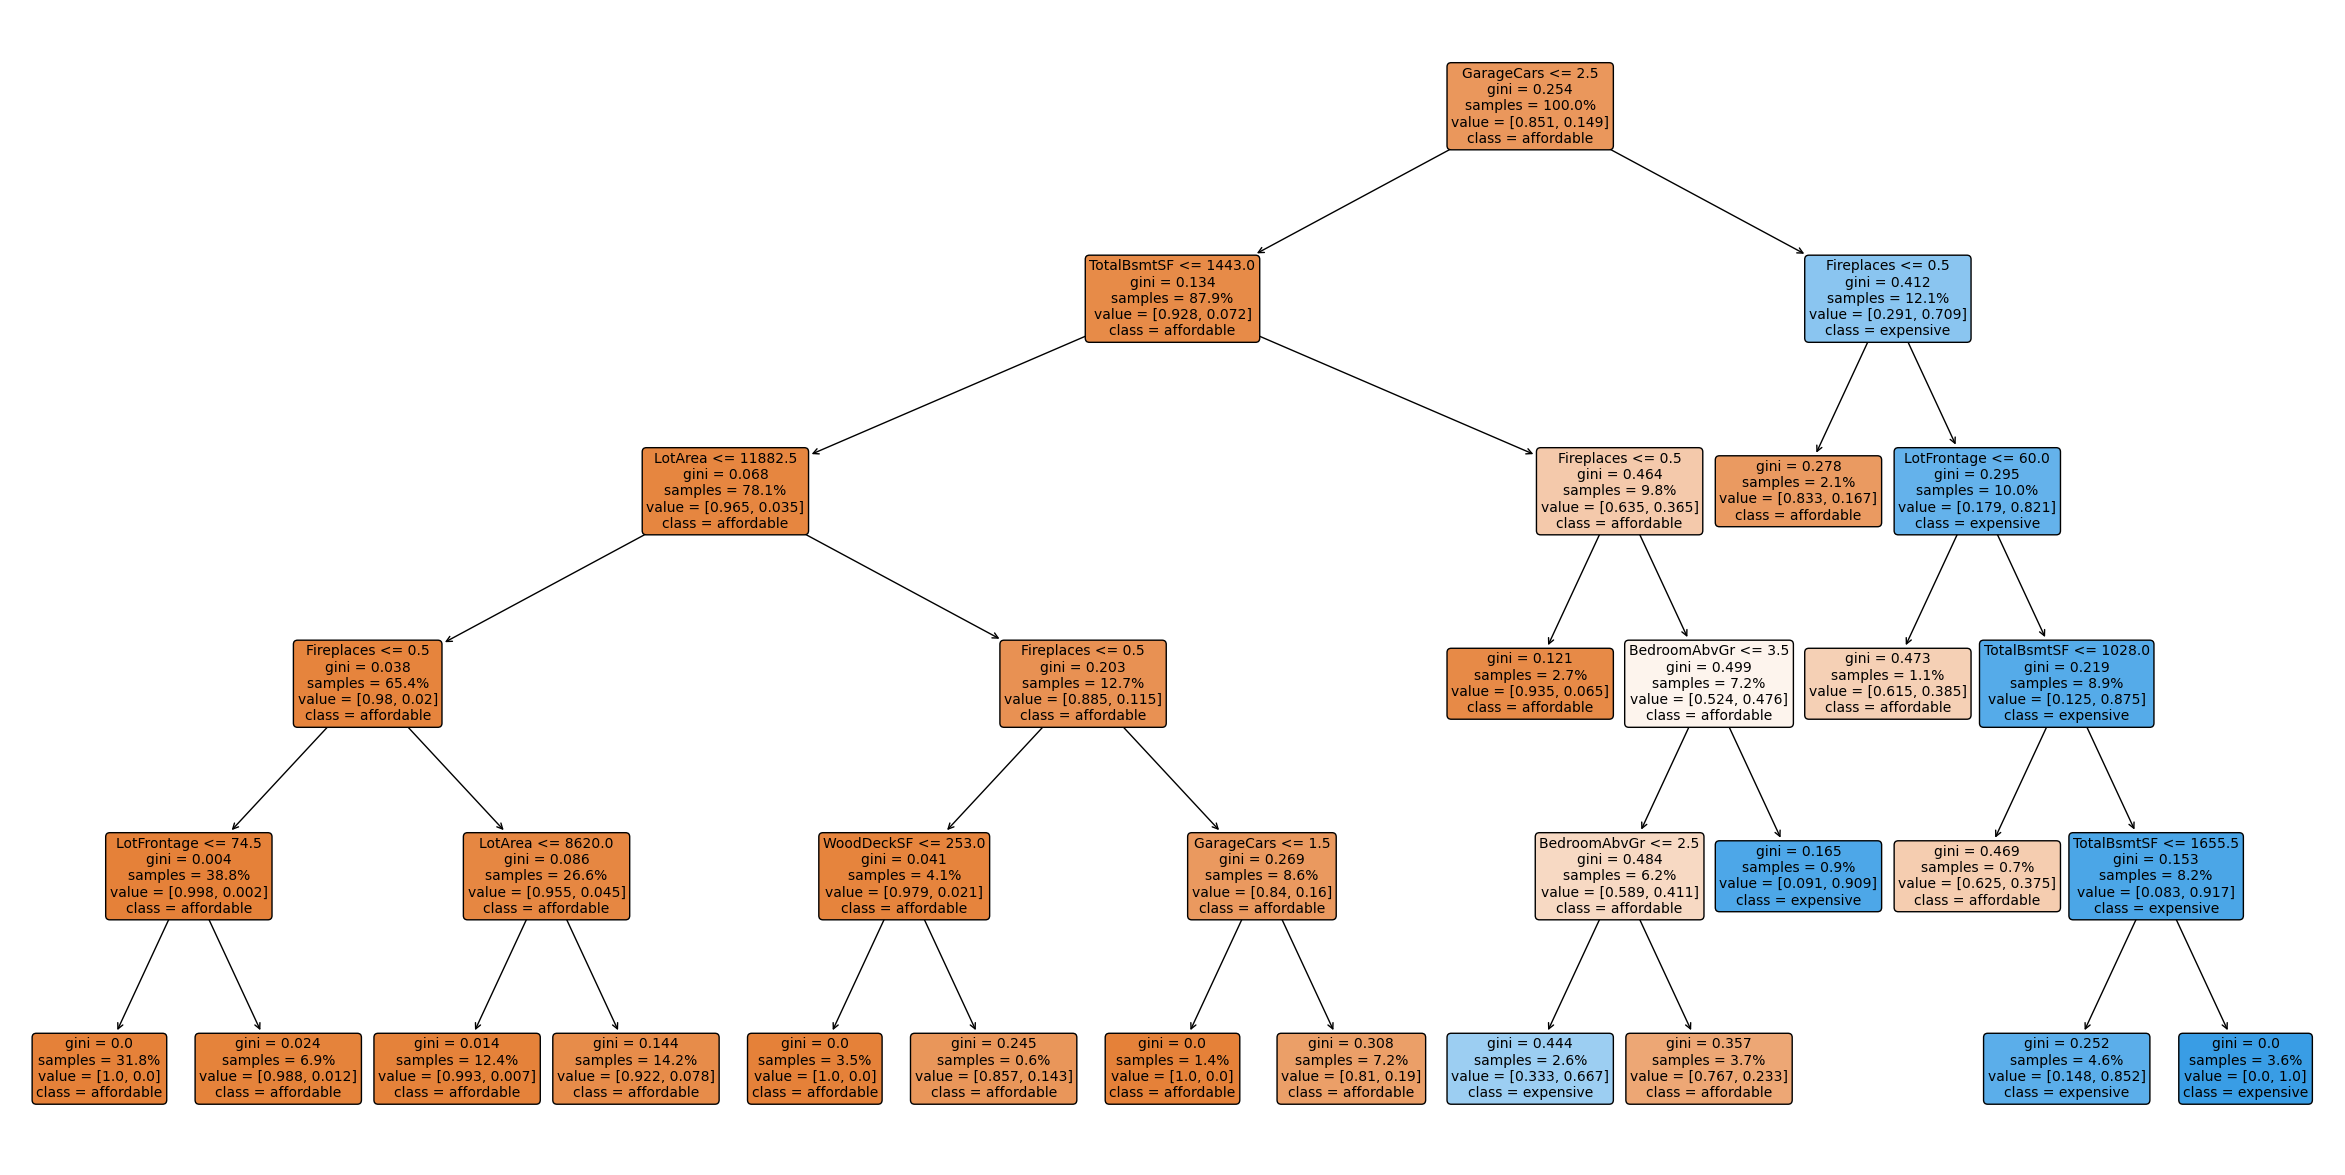

In [113]:
plt.figure(figsize=(30, 15))
plot_tree(search.best_estimator_[1], feature_names=X.columns, class_names=['affordable', 'expensive'], proportion=True, rounded=True, filled=True, fontsize=10);

## Final scores

On training set:

In [114]:
accuracy_score(
  y_pred=search.predict(X_train),
  y_true=y_train)

0.9357876712328768

On test set:

In [115]:
accuracy_score(
  y_pred=search.predict(X_test),
  y_true=y_test)

0.9246575342465754

On complete set:

In [116]:
accuracy_score(
  y_pred=search.predict(X),
  y_true=y)

0.9335616438356165

## Dependence of training on test-fraction

It is important to note that depending on the random distribution of the labeled data-set into training- and test-set, the prediction quality varies. This can be characterized by splitting many times differently and recording accuracies. Doing this for different fractions between training- and test-set, gives the following plot:

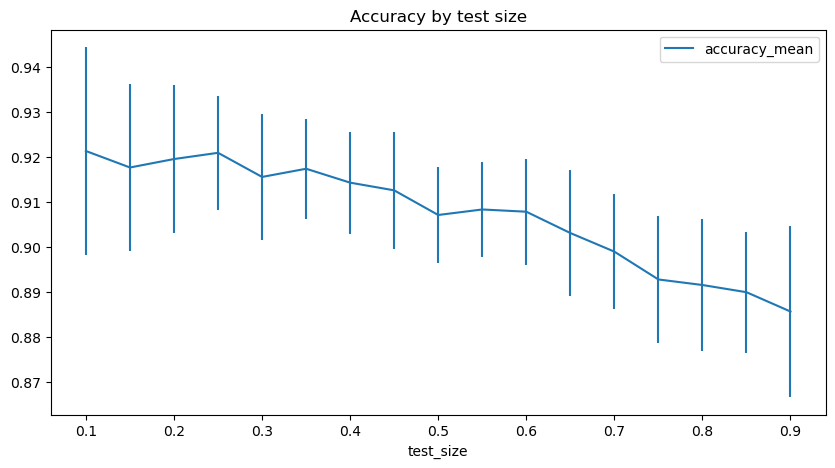

In [117]:
accuracies_by_test_size = pd.DataFrame(columns=['test_size', 'accuracy_mean', 'accuracy_std']).set_index('test_size')

for test_size in np.linspace(0.1, 0.9, 17):
  accuracies = []
  for i in range(100):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)
      search.best_estimator_.fit(X=X_train, y=y_train)
      accuracies.append(accuracy_score(y_pred=search.predict(X_test), y_true=y_test))
  accuracies = pd.Series(accuracies)
  accuracies_by_test_size.loc[test_size] = [accuracies.mean(), accuracies.std()]

accuracies_by_test_size.plot(y='accuracy_mean', yerr='accuracy_std', figsize=(10, 5), title='Accuracy by test size');

So, with a test-fraction of 0.2, we are quite likely better than the baseline model but how much, depends on the case. 